In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\49173\Desktop\distrbution.xlsx')
data=data[ ['men', 'female', 'dependency', 'density', 'cases']]
data.head()

,men,female,dependency,density,cases
0,13277.075,13268.789,81.094141,56.156764,0.816381
1,29216.012,30092.678,52.231467,48.890593,4.747897
2,10444.713,10458.565,87.903957,76.400870,0.908219
3,104469.637,101669.950,85.962354,226.335504,0.806160
4,8170.785,8573.145,84.161070,86.967901,2.293879


In [3]:
data.corr()

,men,female,dependency,density,cases
men,1.000000,0.999713,-0.051297,-0.000057,-0.005802
female,0.999713,1.000000,-0.047549,-0.001576,-0.002578
dependency,-0.051297,-0.047549,1.000000,-0.250771,0.032866
density,-0.000057,-0.001576,-0.250771,1.000000,0.005766
cases,-0.005802,-0.002578,0.032866,0.005766,1.000000


In [4]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [5]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

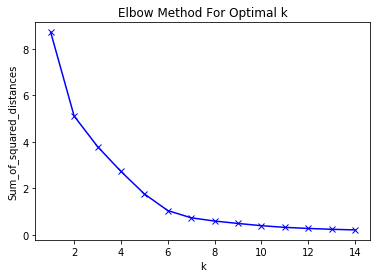

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=1000, centers=6, n_features=5)

df = pd.DataFrame(X, columns=['men', 'female', 'dependency', 'density', 'cases'])

kmeans = KMeans(n_clusters=6)

y = kmeans.fit_predict(data[['men', 'female', 'dependency', 'density', 'cases']])

data['Cluster'] = y

print(data.head())

          men      female  dependency     density     cases  Cluster
0   13277.075   13268.789   81.094141   56.156764  0.816381        4
1   29216.012   30092.678   52.231467   48.890593  4.747897        5
2   10444.713   10458.565   87.903957   76.400870  0.908219        0
3  104469.637  101669.950   85.962354  226.335504  0.806160        3
4    8170.785    8573.145   84.161070   86.967901  2.293879        0


In [22]:
count=0
for i in range(0,92):
    if data.loc[i,"Cluster"]==5:
        count=count+1
print(count)

7
